In [3]:
%pip install -r requirements.txt

  Using cached pandas-2.2.3-cp39-cp39-macosx_10_9_x86_64.whl.metadata (89 kB)
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_x86_64.whl.metadata (60 kB)
  Using cached matplotlib-3.9.4-cp39-cp39-macosx_10_12_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached mlflow-2.20.3-py3-none-any.whl.metadata (30 kB)
  Using cached scikit_learn-1.6.1-cp39-cp39-macosx_10_9_x86_64.whl.metadata (31 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-macosx_10_9_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp39-cp39-macosx_10_10_x86_64.whl.metadata (9.1 kB)
  Using cached pyparsing

In [9]:
# Data preparation
# ========================================================================
import pandas as pd
import numpy as np
from scipy import stats

# Graph
# ========================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
plt.style.use('ggplot')

# MLFlow
# ========================================================================
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature

# Sklearn
# ========================================================================
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Model Performance Evaluators
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

##### Loading the data

In [30]:
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


##### Exploratory Data Analysis aka EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

In [5]:
df.dtypes.value_counts()

float64    30
int64       1
Name: count, dtype: int64

In [6]:
df[df.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean_texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean_perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean_area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean_smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean_compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean_concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean_concave_points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean_symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean_fractal_dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


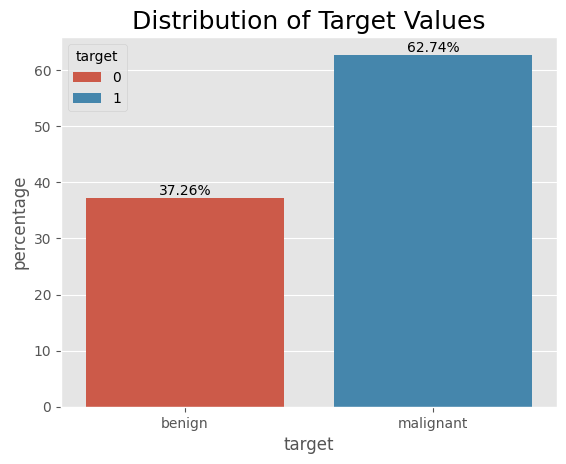

In [7]:
value_counts_df = (round(df.target.value_counts(normalize=True)*100,2)).reset_index()
value_counts_df.columns = ['target', 'percentage']
ax = sns.barplot(x=value_counts_df['target'], y=value_counts_df['percentage'], hue=value_counts_df['target'], dodge=False)
ax.bar_label(ax.containers[0], fmt="%.2f%%")
ax.bar_label(ax.containers[1],fmt="%.2f%%") 
plt.xticks(ticks=[0,1], labels=['benign', 'malignant'])
plt.title('Distribution of Target Values', fontsize=18)
plt.show()

In [10]:
num_cols = list(df.select_dtypes('float64').columns)
unrelated_num_cols = []
categorical_col = 'target'

for i in num_cols:
    # Perform Kruskal-Wallis test
    grouped_data = [df[i][df[categorical_col] == category] for category in df[categorical_col].unique()]
    statistic, p_value = stats.f_oneway(*grouped_data)

    # Set the significance level (alpha)
    alpha = 0.05

    # Print the results with appropriate text color
    if p_value < alpha:
        print( f"ANOVA statistic: {round(statistic, 2)}")
        print(f"p-value: {p_value:.2e}")
        print("\033[32m" + f"Reject the null hypothesis: There is a significant relationship between {i} and {categorical_col}")
        print("\033[0m")  # Reset text color to default
    else:
        print( f"ANOVA statistic: {round(statistic, 2)}")
        print(f"p-value: {p_value:.2e}")
        print("\033[31m" + f"No significant relationship between {i} and {categorical_col}")
        print("\033[0m")  # Reset text color to default
        unrelated_num_cols.append(i)

ANOVA statistic: 646.98
p-value: 8.47e-96
Reject the null hypothesis: There is a significant relationship between mean_radius and target

ANOVA statistic: 118.1
p-value: 4.06e-25
Reject the null hypothesis: There is a significant relationship between mean_texture and target

ANOVA statistic: 697.24
p-value: 8.44e-101
Reject the null hypothesis: There is a significant relationship between mean_perimeter and target

ANOVA statistic: 573.06
p-value: 4.73e-88
Reject the null hypothesis: There is a significant relationship between mean_area and target

ANOVA statistic: 83.65
p-value: 1.05e-18
Reject the null hypothesis: There is a significant relationship between mean_smoothness and target

ANOVA statistic: 313.23
p-value: 3.94e-56
Reject the null hypothesis: There is a significant relationship between mean_compactness and target

ANOVA statistic: 533.79
p-value: 9.97e-84
Reject the null hypothesis: There is a significant relationship between mean_concavity and target

ANOVA statistic: 861.

In [11]:
print(f'The columns that failed the ANOVA test are {unrelated_num_cols}. These columns don\'t help in making predictions.')

The columns that failed the ANOVA test are ['mean_fractal_dimension', 'texture_error', 'smoothness_error', 'symmetry_error', 'fractal_dimension_error']. These columns don't help in making predictions.


##### Data Pre-processing

In [31]:
df.drop(labels=unrelated_num_cols, axis=1, inplace=True)
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'radius_error',
       'perimeter_error', 'area_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'worst_radius', 'worst_texture',
       'worst_perimeter', 'worst_area', 'worst_smoothness',
       'worst_compactness', 'worst_concavity', 'worst_concave_points',
       'worst_symmetry', 'worst_fractal_dimension', 'target'],
      dtype='object')

In [32]:
X = df.drop(columns=['target'])
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,radius_error,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
y = df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

##### Data Scalling

In [35]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

##### Principal Component Analysis (PCA)

In [36]:
model_pca = PCA()
model_pca.fit(X_scaled)

PCA()

In [ ]:
prop_varianza_acum = model_pca.explained_variance_ratio_.cumsum()
n_pca = 0
for i in range(model_pca.n_components_):
    if prop_varianza_acum[i]*100 < 92:
        n_pca += 1
        print(f'At {n_pca} PC, Explained Variance is {round(prop_varianza_acum[i]*100,2)}%')

At 1 PC, Explained Variance is 59.5%
At 2 PC, Explained Variance is 74.83%
At 3 PC, Explained Variance is 82.28%
At 4 PC, Explained Variance is 87.3%
At 5 PC, Explained Variance is 90.77%


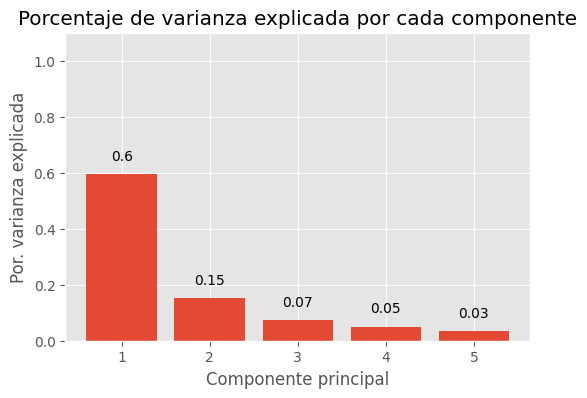

In [84]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(n_pca) + 1,
    height = model_pca.explained_variance_ratio_[:n_pca]
)

for x, y in zip(np.arange(n_pca) + 1, model_pca.explained_variance_ratio_[:n_pca]):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(n_pca) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');


[0.59501941 0.74834484 0.82281042 0.87302617 0.90773815 0.93463044
 0.94988493 0.96079605 0.97080502 0.97756904 0.98223264 0.98576041
 0.98901659 0.99175811 0.99406284 0.99597394 0.99714047 0.99808642
 0.99874701 0.99923814 0.99963744 0.99989128 0.99995833 0.99999314
 1.        ]


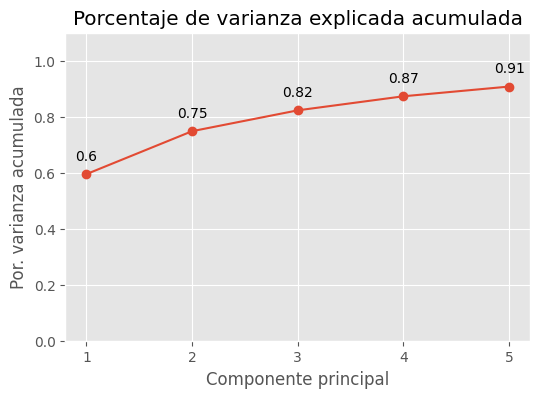

In [83]:
prop_varianza_acum = model_pca.explained_variance_ratio_.cumsum()
print(prop_varianza_acum)

n_pca = 0
for i in range(model_pca.n_components_):
    if prop_varianza_acum[i]*100 < 92:
        n_pca += 1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(n_pca) + 1,
    prop_varianza_acum[:n_pca],
    marker = 'o'
)

for x, y in zip(np.arange(n_pca) + 1, prop_varianza_acum[:n_pca]):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(n_pca) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');
